In [4]:
import os
print(os.listdir("data/"))

['0', '4', '1', '3', '2']


In [5]:
import fnmatch
import numpy as np
import pandas as pd
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
np.random.seed(21)

path = 'data/'
train_label = []
train_img = []

for i in os.listdir('data/'):
    temp_path = path+i+'/'
    for j in fnmatch.filter(os.listdir(temp_path), '*.jpeg'):
        train_label.append(i)
        temp_img = image.load_img(temp_path+j, target_size=(224,224))
        temp_img = image.img_to_array(temp_img)
        train_img.append(temp_img)

print("Length of train image = ",len(train_img))
print("Length of train labels = ",len(train_label))
train_x = np.array(train_img)
train_y = pd.get_dummies(train_label)
train_y = np.array(train_y)
print(train_y.shape)

        

Length of train image =  78
Length of train labels =  78
(78, 5)


In [6]:
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.layers.normalization import BatchNormalization
import keras
def vgg16_model(img_rows, img_cols, channel=1, num_classes=None):

    model = VGG16(weights='imagenet', include_top=False,input_shape=(224,224,3))
    model.layers.pop()
    model.layers.pop()
    model.layers.pop()

    model.outputs = [model.layers[-1].output]
    model.layers[-2].outbound_nodes = []
    x=Conv2D(256, kernel_size=(2,2),strides=2)(model.output)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)    
    x=Conv2D(128, kernel_size=(2,2),strides=1)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x=Flatten()(x)
    x=Dense(num_classes, activation='softmax')(x)

    model=Model(model.input,x)

    for layer in model.layers[:19]:

        layer.trainable = False

    optimizer = keras.optimizers.Adam()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    print(model.summary())
    return model

In [13]:
model = vgg16_model(224,224,3,5)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid=train_test_split(train_x, train_y, test_size=0.1, random_state=42)

from keras.preprocessing.image import ImageDataGenerator
gen_train = ImageDataGenerator(  
    width_shift_range=0.3,
   height_shift_range=0.3,
    horizontal_flip=True

)
gen_valid=ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
   height_shift_range=0.2,horizontal_flip=True)
gen_train.fit(X_train)
gen_valid.fit(X_valid)

In [15]:
history = model.fit_generator(gen_train.flow(X_train, Y_train, batch_size=8, shuffle=True), steps_per_epoch=(train_x.shape[0]//(4*8)), epochs=100, validation_data=gen_valid.flow(X_valid,Y_valid), validation_steps=8)


'''
model.fit(X_train,Y_train,
          batch_size=12,
          epochs=20,
          verbose=1, shuffle=True, validation_data=(X_valid,Y_valid))'''

Epoch 1/100
2/2 [==============================] - 2s - loss: 1.5629 - acc: 0.2500 - val_loss: 4.8328 - val_acc: 0.2656
Epoch 2/100
2/2 [==============================] - 1s - loss: 2.0983 - acc: 0.3750 - val_loss: 4.6951 - val_acc: 0.2500
Epoch 3/100
2/2 [==============================] - 1s - loss: 2.4873 - acc: 0.1875 - val_loss: 3.7325 - val_acc: 0.3281
Epoch 4/100
2/2 [==============================] - 1s - loss: 2.5002 - acc: 0.1875 - val_loss: 4.0052 - val_acc: 0.2344
Epoch 5/100
2/2 [==============================] - 1s - loss: 1.7553 - acc: 0.3690 - val_loss: 3.8643 - val_acc: 0.2656
Epoch 6/100
2/2 [==============================] - 1s - loss: 1.9587 - acc: 0.3125 - val_loss: 3.5369 - val_acc: 0.3281
Epoch 7/100
2/2 [==============================] - 1s - loss: 1.5206 - acc: 0.3125 - val_loss: 4.2502 - val_acc: 0.4688
Epoch 8/100
2/2 [==============================] - 1s - loss: 1.6278 - acc: 0.3125 - val_loss: 3.9146 - val_acc: 0.5156
Epoch 9/100
2/2 [=======================

2/2 [==============================] - 1s - loss: 0.5729 - acc: 0.8552 - val_loss: 2.2512 - val_acc: 0.3125
Epoch 69/100
2/2 [==============================] - 1s - loss: 0.8311 - acc: 0.6875 - val_loss: 1.8655 - val_acc: 0.4531
Epoch 70/100
2/2 [==============================] - 1s - loss: 0.6913 - acc: 0.6875 - val_loss: 2.2256 - val_acc: 0.3125
Epoch 71/100
2/2 [==============================] - 1s - loss: 0.2225 - acc: 1.0000 - val_loss: 2.3830 - val_acc: 0.4219
Epoch 72/100
2/2 [==============================] - 1s - loss: 0.6296 - acc: 0.7242 - val_loss: 2.0646 - val_acc: 0.4688
Epoch 73/100
2/2 [==============================] - 1s - loss: 0.4035 - acc: 0.8750 - val_loss: 2.4505 - val_acc: 0.3125
Epoch 74/100
2/2 [==============================] - 1s - loss: 0.6214 - acc: 0.8750 - val_loss: 2.3850 - val_acc: 0.3438
Epoch 75/100
2/2 [==============================] - 1s - loss: 0.4353 - acc: 0.8750 - val_loss: 2.5168 - val_acc: 0.3750
Epoch 76/100
2/2 [===========================

'\nmodel.fit(X_train,Y_train,\n          batch_size=12,\n          epochs=20,\n          verbose=1, shuffle=True, validation_data=(X_valid,Y_valid))'

8/8 [==============================] - 0s
Log loss is : 
2.12268719077


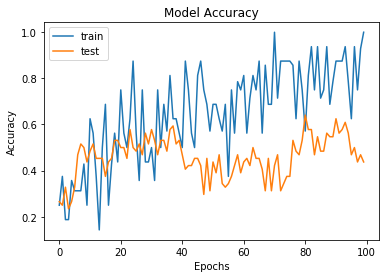

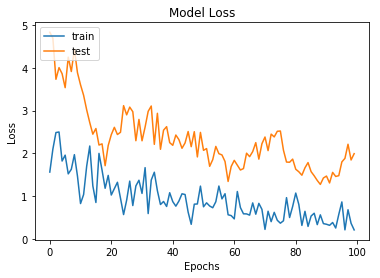

In [19]:
predictions_valid = model.predict(X_valid, batch_size=8, verbose=1)
from sklearn.metrics import log_loss
print("Log loss is : ",)
print(log_loss(Y_valid, predictions_valid))

import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','test'],loc='upper left')


plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

